### **一、导入库**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
 
#其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。通常都是在建模过程中逐渐导入需要的库。

In [2]:
data = pd.read_csv("data/评分卡/rankingcard.csv",index_col=0)

### **二、观察数据**

In [3]:
#观察数据类型
data.head()#注意可以看到第一列为标签，剩下的10列为特征
 
#观察数据结构
data.shape#(150000, 11)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### **三、数据清洗**

- **重复值**

In [4]:
#去除重复值
data.drop_duplicates(inplace=True)#inplace=True表示替换原数据
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [5]:
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

- **缺失值**

In [6]:
#探索缺失值
data.info()
data.isnull().sum()/data.shape[0]#得到缺失值的比例
#data.isnull().mean()#上一行代码的另一种形式书写

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [7]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)
#这里用均值填补家庭人数这一项 
#如果你选择的是删除那些缺失了2.5%的特征，千万记得恢复索引哟~
 
data.info()
data.isnull().sum()/data.shape[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [8]:
def fill_missing_rf(X,y,to_fill):

    """
    使用随机森林填补一个特征的缺失值的函数

    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """

    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

    # 找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]

    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)

    return Ypredict

In [9]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]#y = data.iloc[:,0]
X.shape#(149391, 10)

#=====[TIME WARNING:1 min]=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

#注意可以通过以下代码检验数据是否数量相同
# y_pred.shape ==  data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"].shape

#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

- **异常值**

In [10]:
#描述性统计
# data.describe()
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5426.978534,13242.571259,0.0,0.0,0.180000,1800.000000,4420.000000,7416.000000,10800.000000,23256.100000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [11]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
# 查看一下年龄为0的人有多少
(data["age"] == 0).sum()
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]
 
"""
另外，有三个指标看起来很奇怪：
 
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
 
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
 
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
 
"""
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1272.277397,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2764.320000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,1990.878413,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,4.070000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,820.410000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [12]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [13]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()
 
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基
# 本可以判断，这些样本是某种异常，应该把它们删除。

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [14]:
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
#一定要恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

### **四、标准化**

In [63]:
"""
无论算法有什么样的规定，无论统计学中有什么样的要求，我们的最终目的都是要为业务服务。现在我们要制作评
分卡，评分卡是要给业务人员们使用的基于新客户填写的各种信息为客户打分的一张卡片，而为了制作这张卡片，
我们需要对我们的数据进行一个“分档”，比如说，年龄20~30岁为一档，年龄30~50岁为一档，月收入1W以上为一
档，5000~1W为一档，每档的分数不同。
""";


### **五、样本不均衡问题**

In [16]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()#查看每一类别值得数据量，查看样本是否均衡

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [17]:
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))
#样本个数：149165; 1占6.62%; 0占93.38%

样本个数：149165; 1占6.62%; 0占93.38%


- **引入imblearn库**

In [18]:
#如果报错，就在prompt安装：pip install imblearn
import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
 
from imblearn.over_sampling import SMOTE
 
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_resample(X,y) # 这里应该是resample
 
n_sample_ = X.shape[0]#278584

pd.Series(y).value_counts()
 
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))
#样本个数：278584; 1占50.00%; 0占50.00%

样本个数：278584; 1占50.00%; 0占50.00%


### **七、划分训练集和测试集**

In [19]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)#训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
 
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
 
model_data.to_csv(r".\model_data.csv")#训练数据
vali_data.to_csv(r".\vali_data.csv")#验证数据


### **八、评分卡-分箱**

In [20]:
"""
制作评分卡，是要给各个特征进行分档，以便业务人员能够根据新客户填写的信息为客户打
分。因此在评分卡制作过程中，一个重要的步骤就是分箱。可以说，分箱是评分卡最难，也是最核心的思路，分箱
的本质，其实就是离散化连续变量，好让拥有不同属性的人被分成不同的类别（打上不同的分数），其实本质比较
类似于聚类.

IV          特征对预测函数的贡献
< 0.03      特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除
0.03 ~ 0.09 有效信息很少，对模型的贡献度低
0.1 ~ 0.29  有效信息一般，对模型的贡献度中等
0.3 ~ 0.49  有效信息较多，对模型的贡献度较高
>=0.5       有效信息非常多，对模型的贡献超高并且可疑

可见，IV并非越大越好，我们想要找到IV的大小和箱子个数的平衡点。箱子越多，IV必然越小，因为信息损失会非
常多，所以，我们会对特征进行分箱，然后计算每个特征在每个箱子数目下的WOE值，利用IV值的曲线，找出合
适的分箱个数。

箱子个数必然不能太多，最好控制在十个以下。而用来制作评分卡，最好能在4~5个为最佳.
"""
"""
我们希望不同属性的人有不同的分数，因此我们希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的
属性是尽量不同的，即业界常说的”组间差异大，组内差异小“。对于评分卡来说，就是说我们希望一个箱子内的人
违约概率是类似的，而不同箱子的人的违约概率差距很大，即WOE差距要大，并且每个箱子中坏客户所占的比重（
）也要不同。那我们，可以使用卡方检验来对比两个箱子之间的相似性，如果两个箱子之间卡方检验的P值很
大，则说明他们非常相似，那我们就可以将这两个箱子合并为一个箱子。

基于这样的思想，我们总结出我们对一个特征进行分箱的步骤：
1）我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组
2）确保每一组中都要包含两种类别的样本，否则IV值会无法计算
3）我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止
4）我们让一个特征分别分成[2,3,4.....20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数
5）分箱完毕后，我们计算每个箱的WOE值， ，观察分箱效果
这些步骤都完成后，我们可以对各个特征都进行分箱，然后观察每个特征的IV值，以此来挑选特征。
""";

- **step1：等频分箱**

In [21]:
# dataframe["列名"]
#当这个列存在的时候，就是索引；当这个列名不存在的时候，DataFrame会自动生成叫做这个列名的一个新的列

#按照等频对需要分箱的列进行分箱

#“age”为例子
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20) #等频分箱
 
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""
#在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data.head()
model_data["qcut"]
model_data["qcut"].value_counts()
 
#所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [22]:
# 统计每个分箱中0和1的数量
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]
print(coount_y0,coount_y1)

qcut
(20.999, 28.0]    4243
(28.0, 31.0]      3571
(31.0, 34.0]      4075
(34.0, 36.0]      2908
(36.0, 39.0]      5182
(39.0, 41.0]      3956
(41.0, 43.0]      4002
(43.0, 45.0]      4389
(45.0, 46.0]      2419
(46.0, 48.0]      4813
(48.0, 50.0]      4900
(50.0, 52.0]      4728
(52.0, 54.0]      4681
(54.0, 56.0]      4677
(56.0, 58.0]      4483
(58.0, 61.0]      6583
(61.0, 64.0]      6968
(64.0, 68.0]      6623
(68.0, 74.0]      6753
(74.0, 107.0]     7737
Name: SeriousDlqin2yrs, dtype: int64 qcut
(20.999, 28.0]    7530
(28.0, 31.0]      5985
(31.0, 34.0]      6778
(34.0, 36.0]      4588
(36.0, 39.0]      7523
(39.0, 41.0]      5790
(41.0, 43.0]      5681
(43.0, 45.0]      5941
(45.0, 46.0]      3268
(46.0, 48.0]      6202
(48.0, 50.0]      6181
(50.0, 52.0]      5806
(52.0, 54.0]      5020
(54.0, 56.0]      4045
(56.0, 58.0]      3370
(58.0, 61.0]      4810
(61.0, 64.0]      3204
(64.0, 68.0]      2279
(68.0, 74.0]      1928
(74.0, 107.0]     1388
Name: SeriousDlqin2yrs, dtype: in

In [23]:
[*zip(updown,updown[1:])] # 过于巧妙的操作！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！

[(21.0, 28.0),
 (28.0, 31.0),
 (31.0, 34.0),
 (34.0, 36.0),
 (36.0, 39.0),
 (39.0, 41.0),
 (41.0, 43.0),
 (43.0, 45.0),
 (45.0, 46.0),
 (46.0, 48.0),
 (48.0, 50.0),
 (50.0, 52.0),
 (52.0, 54.0),
 (54.0, 56.0),
 (56.0, 58.0),
 (58.0, 61.0),
 (61.0, 64.0),
 (64.0, 68.0),
 (68.0, 74.0),
 (74.0, 107.0)]

In [24]:

#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
 
#注意zip会按照最短列来进行结合
print("箱子下界","箱子上界","正常用户","风险用户")
num_bins

箱子下界 箱子上界 正常用户 风险用户


[(21.0, 28.0, 4243, 7530),
 (28.0, 31.0, 3571, 5985),
 (31.0, 34.0, 4075, 6778),
 (34.0, 36.0, 2908, 4588),
 (36.0, 39.0, 5182, 7523),
 (39.0, 41.0, 3956, 5790),
 (41.0, 43.0, 4002, 5681),
 (43.0, 45.0, 4389, 5941),
 (45.0, 46.0, 2419, 3268),
 (46.0, 48.0, 4813, 6202),
 (48.0, 50.0, 4900, 6181),
 (50.0, 52.0, 4728, 5806),
 (52.0, 54.0, 4681, 5020),
 (54.0, 56.0, 4677, 4045),
 (56.0, 58.0, 4483, 3370),
 (58.0, 61.0, 6583, 4810),
 (61.0, 64.0, 6968, 3204),
 (64.0, 68.0, 6623, 2279),
 (68.0, 74.0, 6753, 1928),
 (74.0, 107.0, 7737, 1388)]

- **step2：确保每个箱都含有两类用户**

In [25]:
0 in num_bins[0][2:]

False

In [26]:
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue

    """
    合并了之后，第一行的组是否一定有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
    包含两种样本
    所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
    这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
    如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
    """
    #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
        break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break

    """
    这个break，只有在if被满足的条件下才会被触发
    也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
    为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
    但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
    举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in 
    range(5)
    range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
    进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
    因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
    循环就会回到最开始的for i in range(20)中
    此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
    这样就更新了i的取值，循环就不会报错了
    """

- **step3：计算WOE和BAD RATE**

In [27]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
 
def get_woe(num_bins):
    """
    计算WOE值
    """
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)

    df["total"] = df.count_0 + df.count_1#一个箱子当中所有的样本数
    df["percentage"] = df.total / df.total.sum()#一个箱子里的样本数，占所有样本的比例
    df["bad_rate"] = df.count_1 / df.total#一个箱子坏样本的数量占一个箱子里边所有样本数的比例
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

- **step4：卡方检验、箱体合并、IV值**

In [28]:
num_bins

[(21.0, 28.0, 4243, 7530),
 (28.0, 31.0, 3571, 5985),
 (31.0, 34.0, 4075, 6778),
 (34.0, 36.0, 2908, 4588),
 (36.0, 39.0, 5182, 7523),
 (39.0, 41.0, 3956, 5790),
 (41.0, 43.0, 4002, 5681),
 (43.0, 45.0, 4389, 5941),
 (45.0, 46.0, 2419, 3268),
 (46.0, 48.0, 4813, 6202),
 (48.0, 50.0, 4900, 6181),
 (50.0, 52.0, 4728, 5806),
 (52.0, 54.0, 4681, 5020),
 (54.0, 56.0, 4677, 4045),
 (56.0, 58.0, 4483, 3370),
 (58.0, 61.0, 6583, 4810),
 (61.0, 64.0, 6968, 3204),
 (64.0, 68.0, 6623, 2279),
 (68.0, 74.0, 6753, 1928),
 (74.0, 107.0, 7737, 1388)]

In [29]:
get_woe(num_bins).head(5)

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7530,11773,0.060372,0.639599,0.043433,0.077376,-0.577460
1,28.0,31.0,3571,5985,9556,0.049003,0.626308,0.036554,0.061500,-0.520246
2,31.0,34.0,4075,6778,10853,0.055654,0.624528,0.041713,0.069649,-0.512647
3,34.0,36.0,2908,4588,7496,0.038439,0.612060,0.029767,0.047145,-0.459814
4,36.0,39.0,5182,7523,12705,0.065151,0.592129,0.053045,0.077304,-0.376610


In [30]:
num_bins_ = num_bins.copy()
x1 = num_bins_[0][2:]
x1

(4243, 7530)

In [31]:
x2 = num_bins_[0+1][2: ]
x2

(3571, 5985)

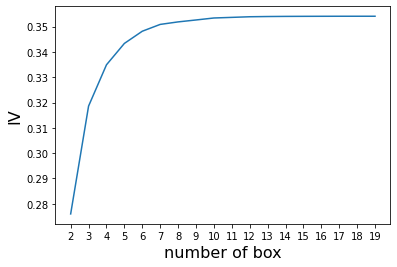

In [32]:
num_bins_ = num_bins.copy()
 
import matplotlib.pyplot as plt
import scipy
 
IV = []
axisx = []
 
while len(num_bins_) > 2:#大于设置的最低分箱个数
    pvs = []
    #获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2: ]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]#p值
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]#计算卡方值
        pvs.append(pv)
        
    # 通过 p 值进行处理。合并 p 值最大的两组,P 值越大，显著性水平越高，相似性越大
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box",fontsize=16)
plt.ylabel("IV",fontsize=16)
plt.show()
#选择转折点处，也就是下坠最快的折线点，所以这里对于age来说选择箱数为6

- **step5：封装分箱函数**


In [33]:
def get_bin(num_bins_,n):
    """
    获取分箱后的结果
    num_bins_:需要分箱的数据
    n:需要分箱的个数
    """
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
 
afterbins = get_bin(num_bins,6)
 
afterbins

[(21.0, 36.0, 14797, 24881),
 (36.0, 54.0, 39070, 51412),
 (54.0, 61.0, 15743, 12225),
 (61.0, 64.0, 6968, 3204),
 (64.0, 74.0, 13376, 4207),
 (74.0, 107.0, 7737, 1388)]

In [34]:
bins_df = get_woe(num_bins)
 
bins_df
#希望每组的bad_rate相差越大越好；
# woe差异越大越好，应该具有单调性，随着箱的增加，要么由正到负，要么由负到正，只能有一个转折过程；
# 如果woe值大小变化是有两个转折，比如呈现w型，证明分箱过程有问题
# num_bins保留的信息越多越好

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24881,39678,0.203469,0.627073,0.151467,0.255670,-0.523516
1,36.0,54.0,39070,51412,90482,0.463991,0.568201,0.399934,0.528294,-0.278352
2,54.0,61.0,15743,12225,27968,0.143420,0.437107,0.161151,0.125620,0.249077
3,61.0,64.0,6968,3204,10172,0.052162,0.314982,0.071327,0.032923,0.773092
4,64.0,74.0,13376,4207,17583,0.090166,0.239265,0.136922,0.043230,1.152877
5,74.0,107.0,7737,1388,9125,0.046793,0.152110,0.079199,0.014263,1.714314


- **step6：封装判断分箱的函数**

In [35]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        global bins_df # 声明全局变量
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

RevolvingUtilizationOfUnsecuredLines


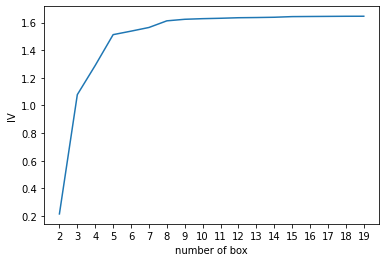

age


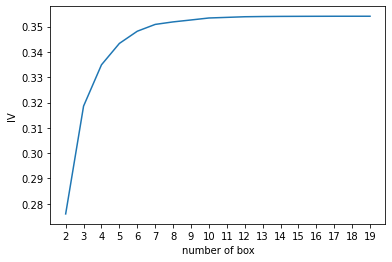

NumberOfTime30-59DaysPastDueNotWorse


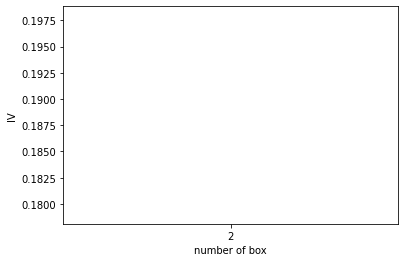

DebtRatio


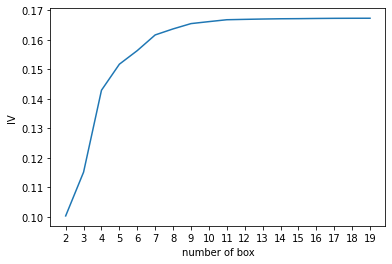

MonthlyIncome


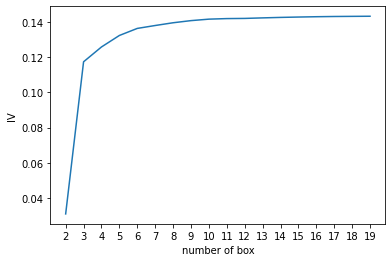

NumberOfOpenCreditLinesAndLoans


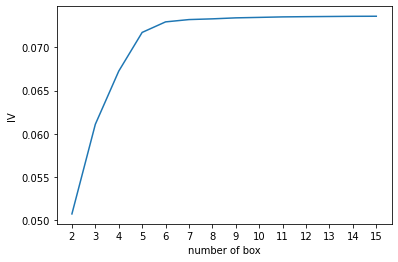

NumberOfTimes90DaysLate


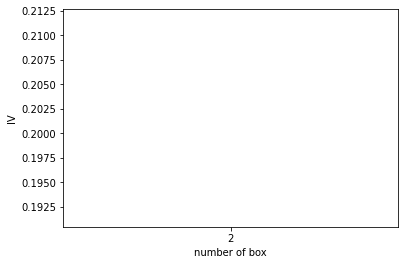

NumberRealEstateLoansOrLines


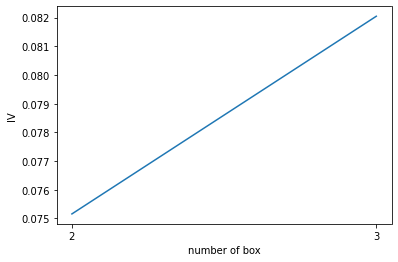

NumberOfTime60-89DaysPastDueNotWorse


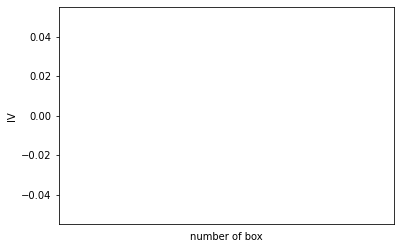

NumberOfDependents


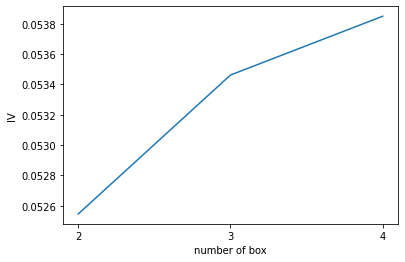

In [36]:
model_data.columns

for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

- **step7：对所有特征进行分箱**

In [37]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [38]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09901726400000001,
  0.29770858889863355,
  0.46509654982605286,
  0.9825770233269827,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01739238445,
  0.32055620260000006,
  1.4722640672420035,
  inf],
 'MonthlyIncome': [-inf, 0.09851976149035914, 6170.119000183422, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

### **八、映射数据**

In [46]:
data = model_data.copy()
 
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
 
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])
 
data.head()

,age,SeriousDlqin2yrs,cut
0,53,0,"(48.5, 58.757]"
1,63,0,"(58.757, 64.0]"
2,39,1,"(-inf, 48.5]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(48.5, 58.757]"


In [47]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut             SeriousDlqin2yrs
(-inf, 48.5]    1                   59286
                0                   39558
(48.5, 58.757]  1                   24422
                0                   23469
(58.757, 64.0]  0                   13551
                1                    8014
(64.0, 74.0]    0                   13376
                1                    4207
(74.0, inf]     0                    7737
                1                    1388
Name: SeriousDlqin2yrs, dtype: int64

In [48]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 48.5]",39558,59286
"(48.5, 58.757]",23469,24422
"(58.757, 64.0]",13551,8014
"(64.0, 74.0]",13376,4207
"(74.0, inf]",7737,1388


In [50]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",39558,59286,-0.408441
"(48.5, 58.757]",23469,24422,-0.043640
"(58.757, 64.0]",13551,8014,0.521435
"(64.0, 74.0]",13376,4207,1.152877
"(74.0, inf]",7737,1388,1.714314


In [40]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
 
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.200062
 (0.099, 0.298]    0.667748
 (0.298, 0.465]   -0.124694
 (0.465, 0.983]   -1.073202
 (0.983, 1.0]     -0.476571
 (1.0, inf]       -2.037194
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.523516
 (36.0, 54.0]   -0.278352
 (54.0, 61.0]    0.249077
 (61.0, 74.0]    1.005985
 (74.0, inf]     1.714314
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0174]     1.508473
 (0.0174, 0.321]    0.073152
 (0.321, 1.472]    -0.313007
 (1.472, inf]       0.175196
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.0985]        1.232324
 (0.0985, 6170.119]   -0.208693
 (6170.119, inf]       0.269672
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.846576
 (1.0, 3.0]    -0.327144
 (3.0, 5.0]    -0.059268
 (5.0, 17.0]    0.124399
 (17.0, inf]    0.464888
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352271
 (0.0, 1.0]    -0.872339
 (1.0, 2.0]    -1.378804
 (2.0, inf]    -1.53785

In [51]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
 
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head(10)

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.278352,2.200062,0.073152,-0.208693,-0.059268,0.352271,0.235673,-0.392968,0.124535,0.622637,0
1,1.005985,0.667748,0.073152,-0.208693,-0.059268,0.352271,0.235673,-0.392968,0.124535,0.622637,0
2,-0.278352,-2.037194,-0.313007,-0.208693,-0.059268,-0.872339,-1.755968,-0.392968,-1.768635,-0.475766,1
3,1.005985,2.200062,-0.313007,-0.208693,0.124399,0.352271,0.235673,0.615272,0.124535,0.622637,0
4,-0.278352,-1.073202,-0.313007,0.269672,0.124399,0.352271,0.235673,0.615272,0.124535,-0.578636,1
5,-0.278352,-0.124694,0.073152,0.269672,0.124399,0.352271,0.235673,0.195109,0.124535,-0.526606,0
6,-0.278352,-1.073202,-0.313007,-0.208693,-0.059268,-0.872339,-2.406633,0.195109,0.124535,-0.475766,1
7,-0.523516,-0.476571,0.175196,-0.208693,-0.846576,0.352271,0.235673,-0.392968,0.124535,0.622637,0
8,-0.523516,-1.073202,0.073152,-0.208693,-0.327144,0.352271,0.235673,-0.392968,0.124535,-0.526606,1
9,-0.523516,0.667748,0.073152,-0.208693,0.124399,0.352271,0.235673,-0.392968,0.124535,0.622637,0


### **九、建模与模型验证**

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
 
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [55]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
 
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)#0.8641356370249832

0.7742414090169427

In [72]:
from cProfile import label
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score
y_pred_cm = lr.predict(vali_X)
print(confusion_matrix(vali_y,y_pred_cm))
print(roc_auc_score(vali_y,y_pred_cm))
print(recall_score(vali_y,y_pred_cm))


[[31892  9709]
 [ 9155 32820]]
0.7742550858127394
0.781893984514592


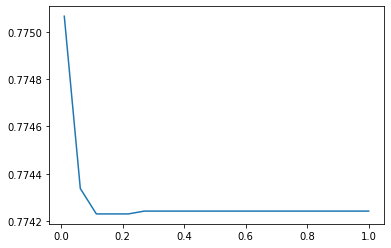

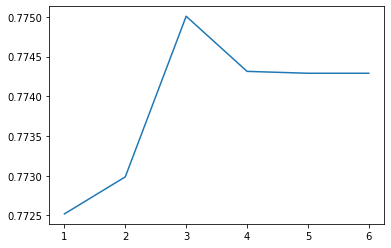

In [62]:
# 稍微调下参数
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

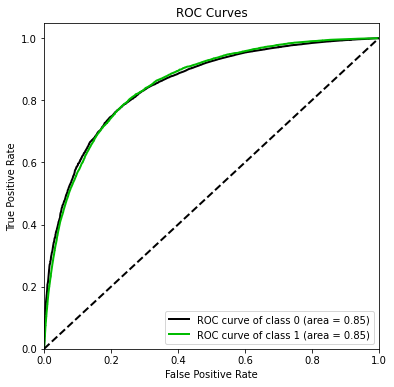

In [57]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

### **十、制作评分卡**

In [58]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [59]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数

cut
(-inf, 36.0]   -11.326397
(36.0, 54.0]    -6.022226
(54.0, 61.0]     5.388845
(61.0, 74.0]    21.764740
(74.0, inf]     37.089630
dtype: float64

In [60]:
file = "./ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

In [5]:
import pandas as pd
ScoreData = pd.read_csv("ScoreData.csv")
ScoreData

,base_score,[481.9994324]
0,age,Score
1,"(-inf, 36.0]",-4.106197372368507
2,"(36.0, 54.0]",-2.183258249597212
3,"(54.0, 61.0]",1.9536365435741638
4,"(61.0, 74.0]",7.890445657671251
5,"(74.0, inf]",13.44623033310069
6,RevolvingUtilizationOfUnsecuredLines,Score
7,"(-inf, 0.099]",47.59889482101833
8,"(0.099, 0.298]",14.446900293452691
9,"(0.298, 0.465]",-2.6977952223791926


### **十一、总结**

In [73]:
"""
0. 数据探究
观测有没null值
观察数据分布
1. 样本选取
可以用前后各取样的方法来选择验证集
或者随机抽样30%作为验证集
2. 变量选取
分箱
通过IV值选取有效特征
把特征变成WOE表现形式
3. 逻辑回归
观测验证集的AUC
4. 评分卡转换
根据逻辑回归的公式转换
设置PDO，基准分等
5. 验证并上线
验证结果
设计策略
""";